In [1]:
library('tidyverse')
ds = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
ds %>% print
df = ds

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  YEAR = col_double(),
  GoogleKnowlege_Occupation = col_character(),
  Show = col_character(),
  Group = col_character(),
  Raw_Guest_List = col_character()
)




# A tibble: 2,693 x 5
    YEAR GoogleKnowlege_Occupation Show    Group    Raw_Guest_List  
   <dbl> <chr>                     <chr>   <chr>    <chr>           
 1  1999 actor                     1/11/99 Acting   Michael J. Fox  
 2  1999 Comedian                  1/12/99 Comedy   Sandra Bernhard 
 3  1999 television actress        1/13/99 Acting   Tracey Ullman   
 4  1999 film actress              1/14/99 Acting   Gillian Anderson
 5  1999 actor                     1/18/99 Acting   David Alan Grier
 6  1999 actor                     1/19/99 Acting   William Baldwin 
 7  1999 Singer-lyricist           1/20/99 Musician Michael Stipe   
 8  1999 model                     1/21/99 Media    Carmen Electra  
 9  1999 actor                     1/25/99 Acting   Matthew Lillard 
10  1999 stand-up comedian         1/26/99 Comedy   David Cross     
# … with 2,683 more rows


In [6]:
ds_group_new = ds %>%
mutate(Group_new = ifelse(Group %in% c("Acting", "Comedy", "Media", "media", "Musician"), "Media/Arts", 
                ifelse(Group %in% c("Politician", "Political Aide", "Military", "Consultant", "Advocacy"), "Government", "Other"))) %>% 
filter(Group_new != "Other")

ds_group_new %>% head


YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,Group_new
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1999,actor,1/11/99,Acting,Michael J. Fox,Media/Arts
1999,Comedian,1/12/99,Comedy,Sandra Bernhard,Media/Arts
1999,television actress,1/13/99,Acting,Tracey Ullman,Media/Arts
1999,film actress,1/14/99,Acting,Gillian Anderson,Media/Arts
1999,actor,1/18/99,Acting,David Alan Grier,Media/Arts
1999,actor,1/19/99,Acting,William Baldwin,Media/Arts


In [33]:
top_10 = ds_group_new %>%
filter(Group_new == "Media/Arts") %>% 
count(Raw_Guest_List) %>%
arrange(-n)

top_10 %>% head(10)

Raw_Guest_List,n
<chr>,<int>
Fareed Zakaria,19
Denis Leary,17
Brian Williams,16
Paul Rudd,13
Ricky Gervais,13
Tom Brokaw,12
Bill O'Reilly,10
Richard Lewis,10
Will Ferrell,10


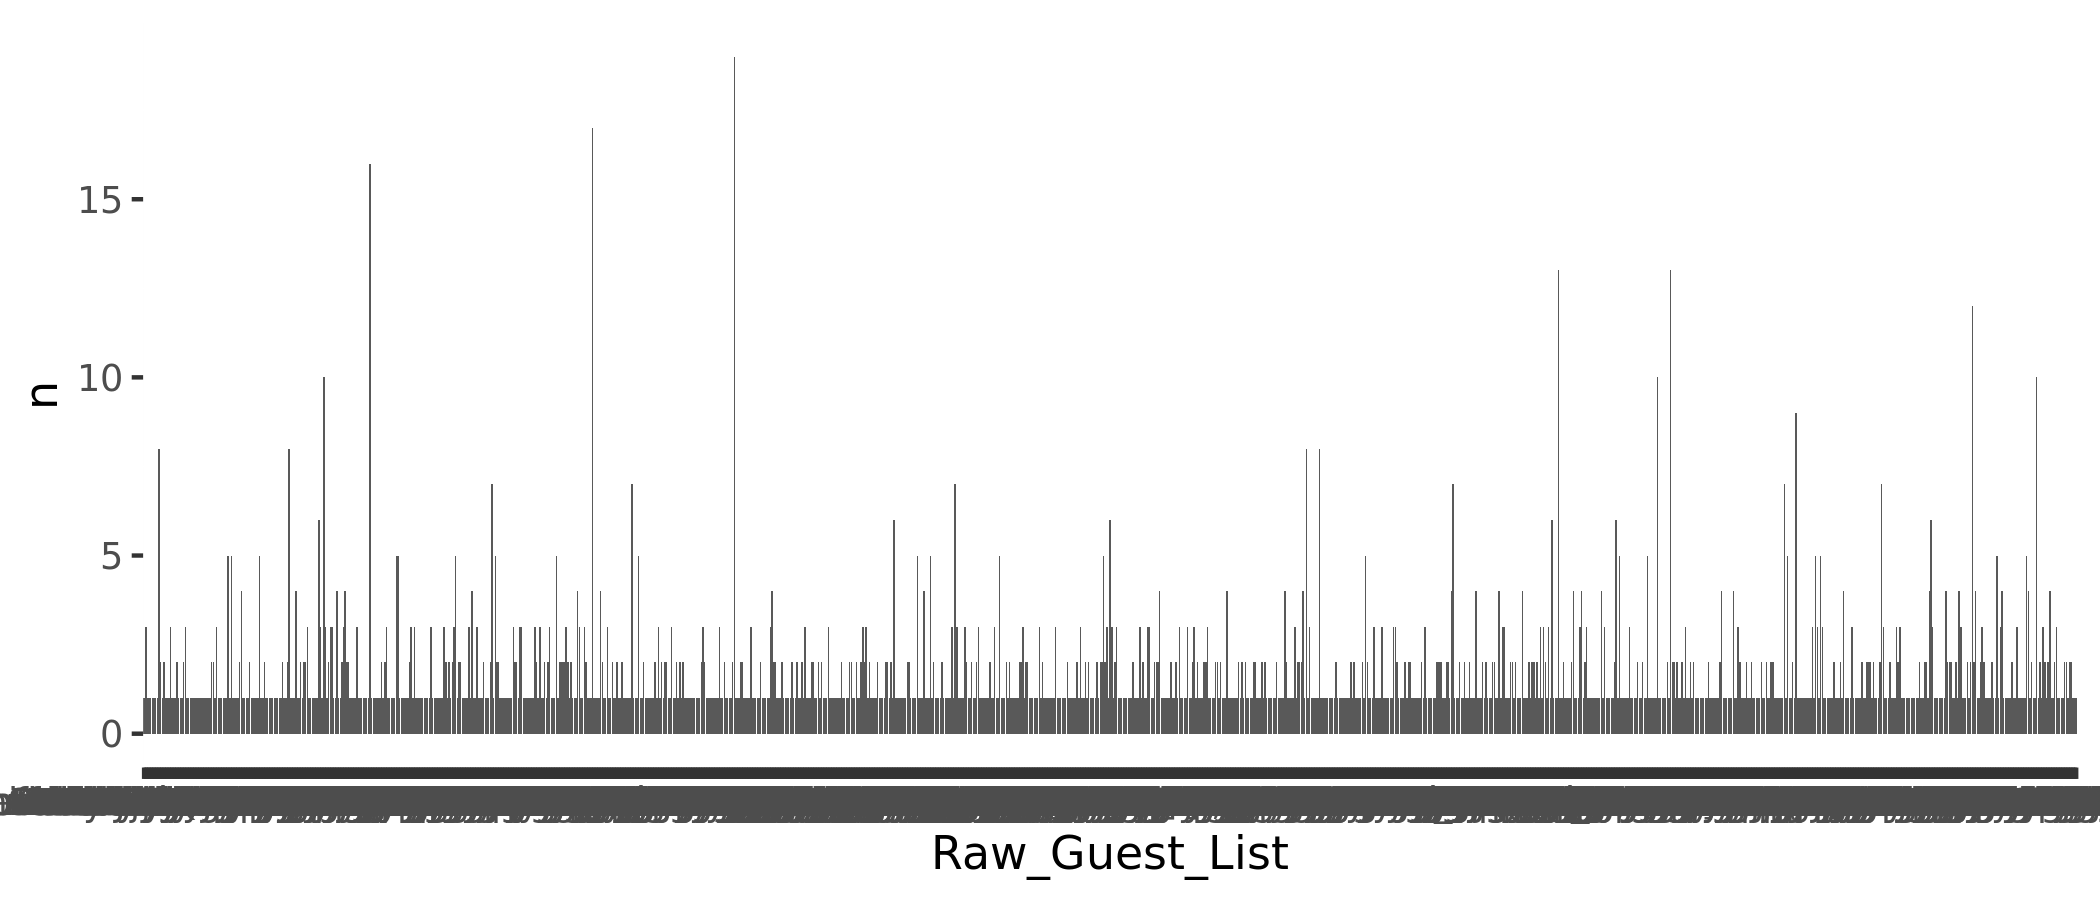

In [44]:
options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 300)
p = ggplot(top_10, aes(x = Raw_Guest_List, y = n))
p = p + geom_col()
p

In [40]:
top_5 = ds_group_new %>%
filter(Group_new == "Government") %>% 
count(Raw_Guest_List) %>%
arrange(-n)

top_5 %>% head(5)


Raw_Guest_List,n
<chr>,<int>
Mike Huckabee,8
Bill Clinton,7
Bob Dole,7
Elizabeth Warren,6
Madeleine Albright,6


Let's look at the percentage of Media guests vs government guests over the years. 

In [4]:
ds_group_new_percent = ds_group_new %>% group_by(YEAR, Group_new) %>% count %>% group_by(YEAR) %>% mutate(percent = n/sum(n) * 100)
ds_group_new_percent %>% head

YEAR,Group_new,n,percent
<dbl>,<chr>,<int>,<dbl>
1999,Media/Arts,161,100.0000000
2000,Government,2,1.3513514
2000,Media/Arts,146,98.6486486
2001,Government,1,0.6849315
2001,Media/Arts,145,99.3150685
2002,Government,3,2.0833333


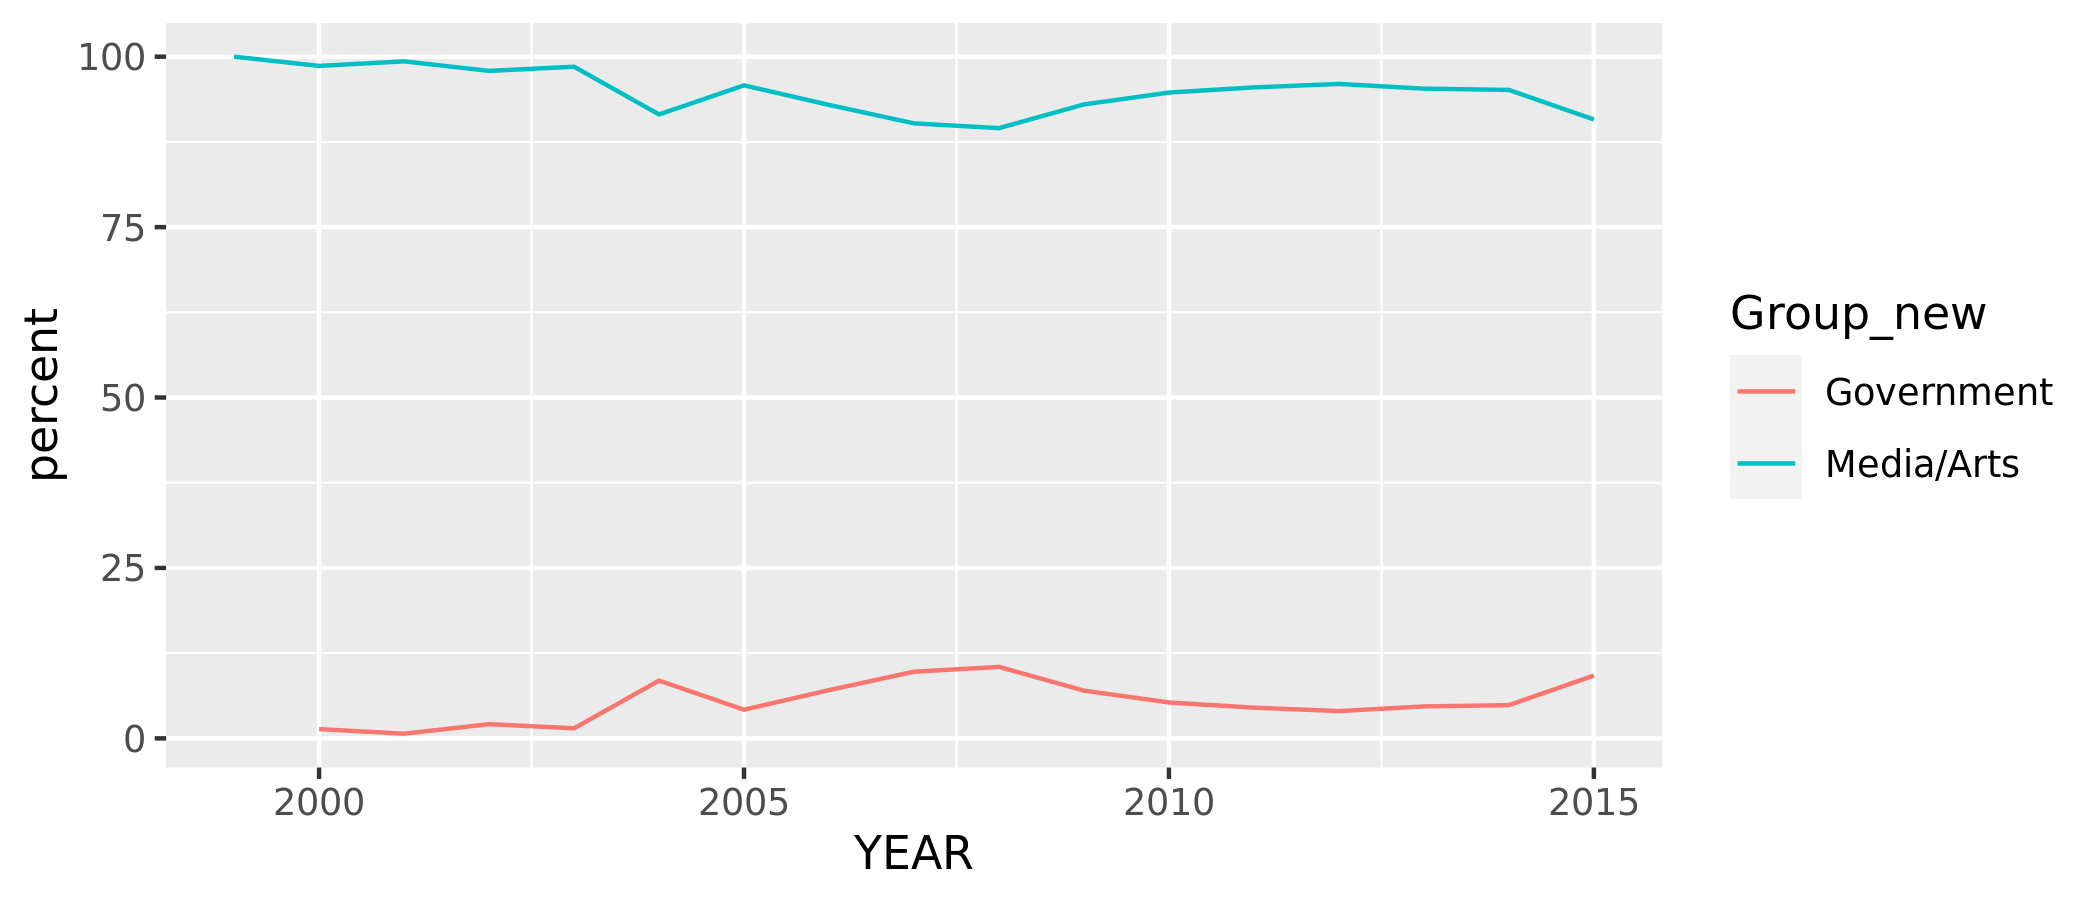

In [46]:
p = ggplot(ds_group_new_percent, aes(x = YEAR, y = percent, color = Group_new))
p = p + geom_line()
p

In [11]:
ds %>%
group_by(YEAR) %>%
count(Group)

YEAR,Group,n
<dbl>,<chr>,<int>
1999,Acting,108
1999,Comedy,25
1999,Media,11
1999,Musician,17
1999,Politician,2
1999,NA,3
2000,Acting,100
2000,Advocacy,1
2000,Athletics,3


In [14]:
ds %>% head

YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
<dbl>,<chr>,<chr>,<chr>,<chr>
1999,actor,1/11/99,Acting,Michael J. Fox
1999,Comedian,1/12/99,Comedy,Sandra Bernhard
1999,television actress,1/13/99,Acting,Tracey Ullman
1999,film actress,1/14/99,Acting,Gillian Anderson
1999,actor,1/18/99,Acting,David Alan Grier
1999,actor,1/19/99,Acting,William Baldwin


In [23]:
ds %>%
count(Group) %>% 
arrange(-n) %>%
head(1)

Group,n
<chr>,<int>
Acting,930


Within all guests, Actors appeared the most on the Daily Show. 

In [7]:
top_actors = ds %>%
filter(Group == "Acting") %>%
count(Raw_Guest_List) %>%
arrange(-n)

top_actors %>% head(10)

Raw_Guest_List,n
<chr>,<int>
Denis Leary,17
Paul Rudd,13
Will Ferrell,10
Adam Sandler,8
Ben Affleck,8
Maggie Gyllenhaal,8
Colin Firth,7
Samuel L. Jackson,7
Steve Carell,7


Above are the top 10 actors on the Daily Show. 

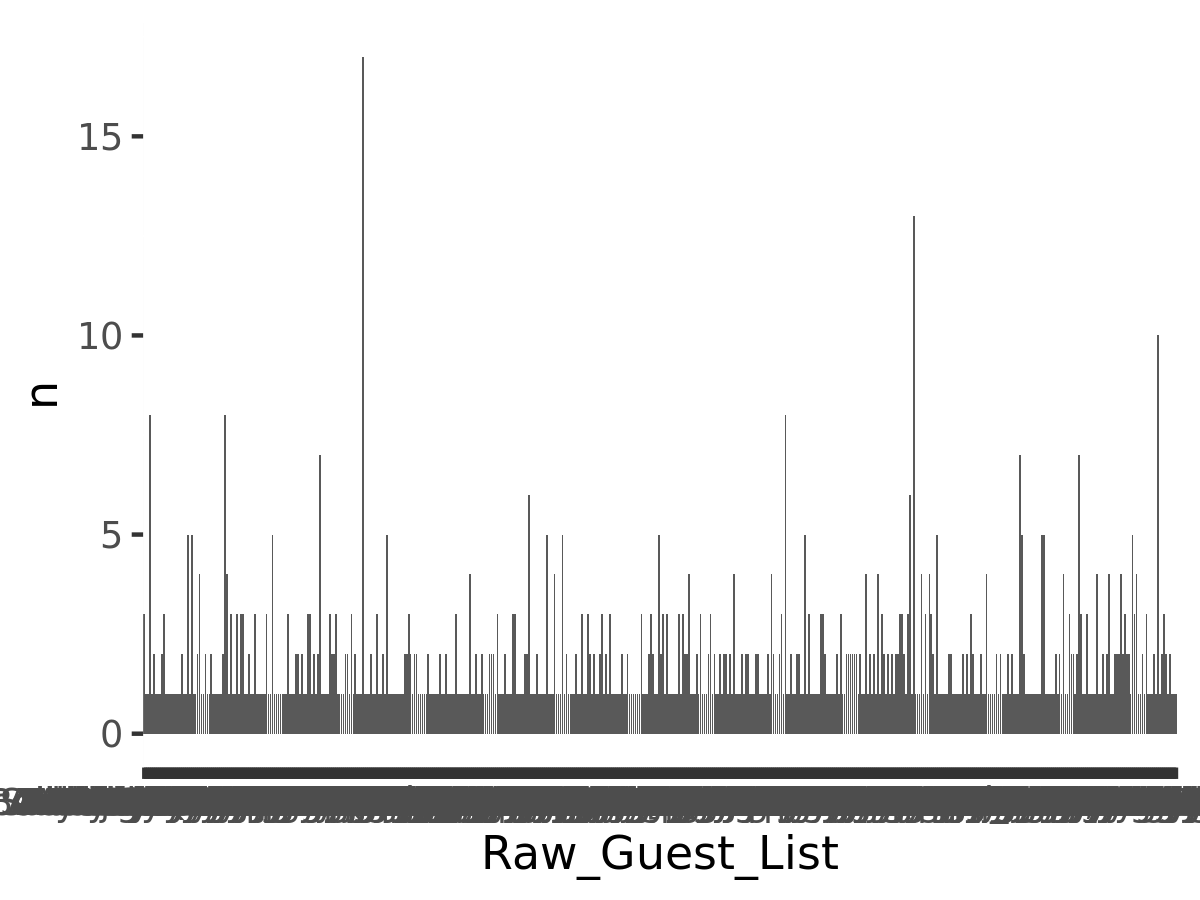

In [9]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)
p = ggplot(top_actors, aes(x = Raw_Guest_List, y = n))
p = p + geom_col()
p